In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv",header=None,usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic Acid']
df.sample(5)

,Class label,Alcohol,Malic Acid
12,1,13.75,1.73
16,1,14.30,1.92
135,3,12.60,2.46
165,3,13.73,4.36
95,2,12.47,1.52


<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

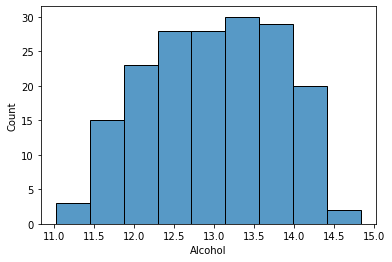

In [24]:
sns.histplot(df['Alcohol'])

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

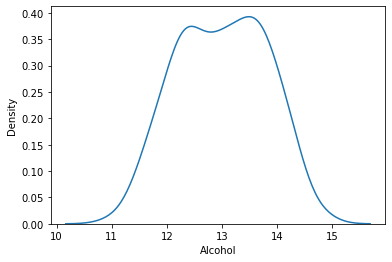

In [25]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

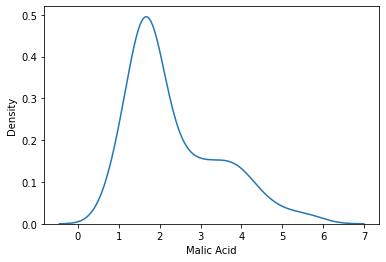

In [26]:
sns.kdeplot(df['Malic Acid'])

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

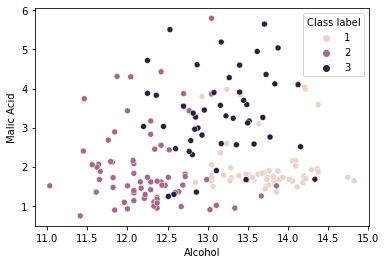

In [27]:
sns.scatterplot(data=df,x="Alcohol",y="Malic Acid",hue="Class label")

### TrainTestSplit

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    df.drop(columns='Class label',axis=1),
    df['Class label'],
    test_size = 0.3,
    random_state = 0
)
x_train.shape,x_test.shape

((124, 2), (54, 2))

### MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [30]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [32]:
np.round(x_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [33]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0
